In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lecture 6- kNN, Normalization, Distance Metrics, Weighted Neighbours *

# Table of Contents
* [Lecture 6- kNN, Normalization, Distance Metrics, Weighted Neighbours *](#Lecture-6--kNN,-Normalization,-Distance-Metrics,-Weighted-Neighbours-*)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [Machine Learning using kNN](#Machine-Learning-using-kNN)
	* &nbsp;
		* [Measures of resemblance - (Euclidean)](#Measures-of-resemblance---%28Euclidean%29)
	* [kNN and the problem of scale](#kNN-and-the-problem-of-scale)
	* [kNN and data normalization/standardization](#kNN-and-data-normalization/standardization)
		* [Normalization (or Min-Max scaling)](#Normalization-%28or-Min-Max-scaling%29)
		* [Standardization (or Z-score normalization)](#Standardization-%28or-Z-score-normalization%29)
	* [Alternative similarity metrics](#Alternative-similarity-metrics)
		* [Cosine similarity](#Cosine-similarity)
		* [Jaccard similarity](#Jaccard-similarity)
	* [kNN and weighted decision aggregation](#kNN-and-weighted-decision-aggregation)
		* [Weighted average calculation](#Weighted-average-calculation)
	* [Introduction to Python's Machine Learning Toolkit Scikit-Learn](#Introduction-to-Python's-Machine-Learning-Toolkit-Scikit-Learn)
		* [Nearest Neighbor Search Algorithms (from http://scikit-learn.org)](#Nearest-Neighbor-Search-Algorithms-%28from-http://scikit-learn.org%29)
		* [Example (Regression)](#Example-%28Regression%29)
		* [Example (Classification)](#Example-%28Classification%29)
	* [When to Use k-Nearest Neighbours](#When-to-Use-k-Nearest-Neighbours)


---

### Content

1. kNN and the problem of scale
2. kNN and data normalization/standardization
3. Euclidean, Cosine, Jaccard similarity distance metric
4. kNN and weighted decision aggregation
5. Intro to scikit-learn


\* Material in this notebook has been in part adapted from Sebastian Raschka, where the material can be found at
http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/preprocessing/about_standardization_normalization.ipynb, http://scikit-learn.org

### Learning Outcomes

At the end of this lecture, you should be able to:

* articulate the problem kNN faces on data with different scales
* rescale data using normalization, standard score and absolute standard score
* apply the Euclidean, Cosine and Jaccard Similarity metrics 
* apply weighted aggregation to the kNN algorithm
* use the scikit-learn toolkit at an introductory level

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math 
from sklearn import neighbors

%matplotlib inline

# Machine Learning using kNN

We saw how we could use linear regression to build a model that encodes a pattern in data. This model (equation), could then be used to either describe the relationship that exists in the data, or it could also be used as a way of predicting the response variable based on input variables.

Here we will consider a machine learning (ML) algorithm that is arguably one of the most intuitive
of all the machine learning algorithms. It is a **simple algorithm** but despite its simplicity, it is a **widely used algorithm in business and industrial settings**. 

The algorithm we will use is called **k-nearest neighbors (kNN)**. kNN is a curious ML algorithm as it **does not require us to explicitly build a model**. The data itself is the model. kNN is referred to as an instance-based learning algorithm, or a lazy learning algorithm as it does no computation until a classification is required. It is useful as it can be used in both regression (continuous value prediction) or classification (class label prediction) problems.

So how does it work? As it turns out, it works very much like we do when faced with solving a problem. If you were asked to find out what the price for a 2 bedroom, 1 garage rental home in Albany would cost, how would you do it? You would most likely go to TradeMe as we did before or some other Real Estate agency website and look up a number of homes that are most similar to the requirement of "2 bedroom, 1 garage" home in Albany. Once you have these figures, you would then average and aggregate their prices to come up with your estimate. kNN works the same, where `k` represents the total number of instances closest to the data point you are wanting to classify.

### Measures of resemblance - (Euclidean)

This brings us to the next point. **How do we determine how close something is to something else? To what degree does one item resemble another?**

**resemblance quantifies the extent to which two things are similar or different to one another.**

There are many resemblance metrics we can use, in this example we will consider the Euclidean distance. The resemblance metric in kNN forms the other part of the model. We calculate $d$ as the distance between points $x$ and $y$, having 2 features as follows:


$ d(x, y) = \sqrt{ (x_i-y_i)^2 + (x_j-y_j)^2}.$

The above distance measure works well for a house query where we want to know how close house $x$ is to house $y$ given that both $x$ and $y$ have 2 features, $i$ and $j$ to represent a feature for `bedroom` and a feature for `garage`. But what if you wanted to find out how similar 2 houses were based on more than two features such as houses with "2 bedrooms, 2 bathrooms, 1 garage, 2 living areas, 150m$^2$"? Euclidean distance can easily be generalized to multiple features as follows: 

$d(x, y) = \sqrt{(x_1- y_1)^2 + (x_2 - y_2)^2+...+(x_i - y_i)^2+...+(x_n - y_n)^2}.$

In order to find the `k` most similar data points to $x$, we therefore must calculate the **similarity** ($d$ values) of $x$ to all the $y$s in the dataset. Then we must **order** the list of $d$ values from smallest to greatest, and **select the `k` first values** in the list. All that remains to be done then is to take the house price of the `k` values and find the mean. The mean value then represents our prediction for the house price given the requirements.

The tricky part is selecting the **size of `k`**. If the dataset were perfect, then `k=1` would be enough to return the correct answer. However, this is almost never the case and so we need to aggregate data from several neghbours in order to account for `noise` that might exist in the data. **Having a `k` that is too small will likely produce a result that captures the idiosyncrasies within the data, while having a `k` that is too high will aggregate too many data points and produce inaccurate results as well.**

**Exercise**: Your task is to write a function that calculates the Euclidean distance of 2 points that are of type list and returns the distance. Below is the function prototype:

In [3]:
def euclidean_distance(x, y):
    d = 0.0
    
    # write your calculations here
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    d = math.sqrt(d)
    
    return d


In [4]:
euclidean_distance([2,2],[4,4])


2.8284271247461903

## kNN and the problem of scale

**Datasets with features of different scale or magnitude can have a detrimental effect on the accuracy of kNN**. Features at different scales will affect the outcome of the distance metrics at a proportional degree to their magnitude. This means that if the feature scales in the dataset are not consistent with their importance, then they will have a disproportionate effect or bias on the final result which will lead to a degraded accuracy.

For example, given a kNN problem of predicting house prices based on a house's number of bedrooms (ranging from 1 - 10) and a house's ratable value (anywhere from \$100,000 - \$10,000,000), which feature do you believe will dominate the equation for determining the Euclidean distance?

In [5]:
#house you're interested in
x = [4, 400000]

#house 1
n1 = [1, 401000]

#house 2
n2 = [4, 402000]

euclidean_distance(x, n1)

1000.0044999898751

In [6]:
euclidean_distance(x, n2)

2000.0

## kNN and data normalization/standardization

### Normalization (or Min-Max scaling)

In this approach, the data is scaled to a fixed range - usually 0 to 1.  
 
The cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

Normalization is typically done via the following equation:

<div style="font-size: 140%;">  
$$ \begin{equation} X_{norm} = \frac{x_i - X_{min}}{X_{max}-X_{min}} \end{equation} $$
</div>


**Exercise:**: Given a list [10,20,30,40] write function code to produce a normalized list.

In [7]:
def normalize(x):
    x_norm = []
    
    #your code
    x_min = float(np.min(x))
    x_range = float(np.max(x) - x_min)
    
    for i in range(len(x)):
        x_norm.append((x[i] - x_min) / x_range)
    
    return x_norm

x = [10, 20, 30, 40]
normalize(x)


[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

Sometimes we need to transform values into a specific range: 

In [8]:
def scale(x, target_range):
    x_scaled = []
    
    #your code
    x_min = np.min(x)
    x_range = float(np.max(x) - np.min(x))
    
    for i in range(len(x)):
        x_scaled.append( (x[i] - x_min) / float(x_range) * (target_range[1] - target_range[0]) + target_range[0])
    
    return x_scaled

x = [0, 20, 30, 40]
scale(x, [0,255])

[0.0, 127.5, 191.25, 255.0]

### Standardization (or Z-score normalization)

One alternative to normalization is **standardization**. The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   



 $\mu = 0$ and $\sigma = 1$ 



where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:


<div style="font-size: 140%;">  
$$ \begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} $$
</div>

 

and standard deviation:  


<div style="font-size: 140%;">  
$$ \begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}\end{equation} $$
</div>



Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. 

**Exercise:**: Given a list [10,20,30,40] write function code to produce a standardized list.

In [9]:
def standardize(x):
    x_stand = []
    
    #your code
    mean = np.mean(x)
    std = np.std(x)
    
    for i in range(len(x)):
        x_stand.append( (x[i] - mean) / std) 
    
    return x_stand

x = [10, 20, 30, 40]
standardize(x)


[-1.3416407864998738,
 -0.4472135954999579,
 0.4472135954999579,
 1.3416407864998738]

However, the problem with the standard score is that it is greatly influenced by outliers. The presence of outliers can have significant effects on the means, because of this, the standard Z-score formula is sometimes altered to:



<div style="font-size: 140%;">  
$$ \begin{equation} \frac{x_i - median}{aad} \end{equation} $$
</div>


where the average absolute deviation ($aad$) is:

<div style="font-size: 140%;">  
$$ \begin{equation} \frac{1}{n}\sum_{i=1}^n |x_i-median(X)| \end{equation} $$
</div>

where $n$ is the number of samples.



The above is called the **Modified Standard Score** and is more robust in noisy datasets where outliers are common.

**Exercise:**: Given a list [10,20,30,40 write function code to produce a list that has been transformed into the Modified Standard Score.

In [10]:
def mod_standard_score(x):
    x_mss = []
    
    #your code
    median = np.median(x) # 中位数
    print(median)
    aad = 0.0
    l = len(x)
    
    for i in range(len(x)):
        aad += np.abs(x[i] - median)
        
    aad = aad / float(l)
    for i in range(len(x)):
        x_mss.append((x[i] - median) / aad)
    
    return x_mss

x = [10, 20, 30, 40]
mod_standard_score(x)


25.0


[-1.5, -0.5, 0.5, 1.5]

The effects of the above scaling techniques is depicted below using our student grades dataset.


In [11]:
grades = pd.read_csv("../datasets/grades_prediction_mode.csv", index_col=0)
grades.head()


,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
1,2.5,4.50,3.2,3.8,NaN,14.00,10.0,24.00,E,INT
2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
3,4.0,NaN,3.0,7.7,9.5,24.20,23.0,47.20,R,INT
4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT


As we can see in the table above, the features **A5** and **Exam**  are measured on different scales, so that ***Feature Scaling*** is necessary and important prior to any comparison or combination of these data.  

In [12]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(grades[['A5', 'Exam']].dropna())
df_std = std_scale.transform(grades[['A5', 'Exam']].dropna())

minmax_scale = preprocessing.MinMaxScaler().fit(grades[['A5', 'Exam']].dropna())
df_minmax = minmax_scale.transform(grades[['A5', 'Exam']].dropna())


In [13]:
scaler = preprocessing.StandardScaler().fit(grades[['A5', 'Exam']].dropna())

In [14]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

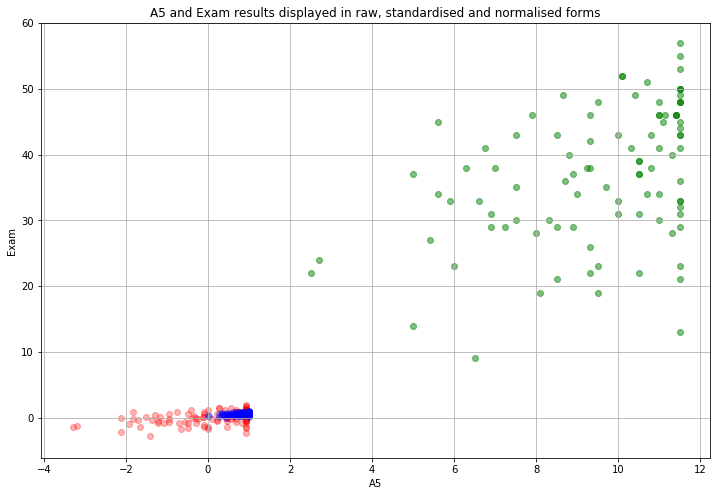

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.scatter(grades['A5'], grades['Exam'], 
            color='green', label='input scale', alpha=0.5)

ax.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

ax.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='Normalized [min=0, max=1]', alpha=0.3)

ax.set_title('A5 and Exam results displayed in raw, standardised and normalised forms')
ax.set_xlabel('A5')
ax.set_ylabel('Exam')
#ax.legend()
ax.grid()



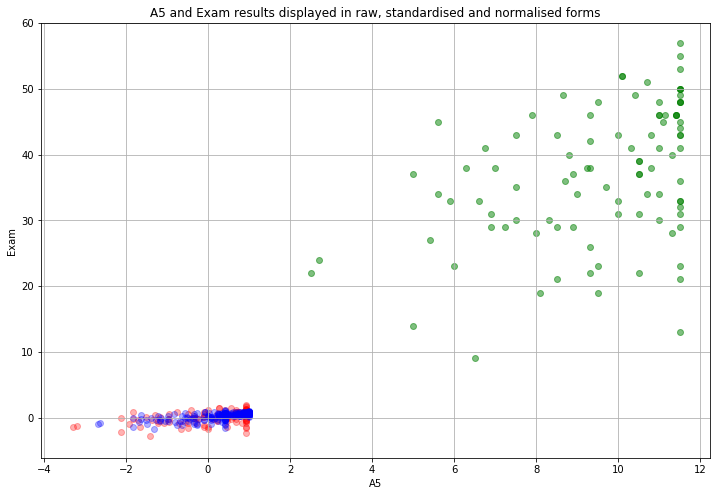

In [16]:
from sklearn.preprocessing import RobustScaler

robustscaler_scale = preprocessing.RobustScaler(quantile_range=(25, 75)).fit(grades[['A5', 'Exam']].dropna())
df_robustscaler = robustscaler_scale.transform(grades[['A5', 'Exam']].dropna())

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.scatter(grades['A5'], grades['Exam'], 
            color='green', label='input scale', alpha=0.5)

ax.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

ax.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='Normalized [min=0, max=1]', alpha=0.3)

ax.scatter(df_robustscaler[:,0], df_robustscaler[:,1], 
            color='blue', label='Robust Scaler [min=0, max=1]', alpha=0.3)


ax.set_title('A5 and Exam results displayed in raw, standardised and normalised forms')
ax.set_xlabel('A5')
ax.set_ylabel('Exam')
#ax.legend()
ax.grid()



## Alternative similarity metrics

So far we have learned how to apply the Euclidean distance metric as a measure of similarity between two points. Though this is a very simplistic measure, it is used surprisingly frequently in real world applications and is always the baseline metric against which to experiment with more complex measures. Therefore,  Euclidean distance is a good starting point and often there is no need to proceed to more complex solutions.

The Euclidean distance has **weaknesses** though. When we have data that is dense (all features more or less have meaningful values), then the Euclidean distance is ideal. In situations where the data is however is **sparse**, it **no longer becomes a useful measure**. 

This happens most often in text classification, information retrieval and recommender engines. Text classification usually relies on counting the frequency of occurrences of key words in order to classify if a document or article is for example from a sports, news, finance category etc. The problem is that languages are made up of tens of thousands of words, so many words that are common in for example, sports articles, will not occur in finance articles or documents. In this case we end up with sparse data and determining a meaningful distance measure in this instance becomes a challenge. Similar situation arises in recommender engines and user data that encodes preferences or ratings across hundreds of thousands possible products, where each customer has provided feedback on only a small portion of available products.

### Cosine similarity

To mitigate the above problem, the Cosine similarity metric was devised and works very well on this problem domain (as well as others like recommender engines or collaborative filtering). **Cosine similarity is not affected by missing values** in the comparison of the two vectors and is **also unaffected by the size (magnitude) of the vectors being compared**. Thus, when comparing documents or customer preferences,  it takes out the influence of the document length or the number of preferences in the calculation and **focuses only on the commonalities**.

Cosine similarity calculates the cosine of the angle between two items. It is a measure of similarities between the orientations of two vectors. The cosine of 0 degrees (perfect similarity) is 1, and it is less than 1 for any other angle. Thus, two vectors with the same orientation have a cosine similarity of 1, two vectors at 90 degrees have a similarity of 0, and two vectors diametrically opposed have a similarity of -1. Its outcome is neatly bounded between -1 and 1. 

Below is the equation for it:

<div style="font-size: 140%;">  
$$ \begin{equation} \text{cosine similarity}  = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \cdot B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} } \end{equation}
 $$
</div>

where $·$ indicates the dot product and $||x||$ indicates the length of the vector $x$. The dot product of two vectors x = [1,2,3] and y = [3,4,5] is:

$x · y = (1 \times 3) + (2 \times 4) +(3 \times 5)
   = 3 + 8 + 15
   = 26$
   
The length of vector $x$ is:

$x_{len} = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{1 + 4 + 9} = \sqrt{14}$

   
**Exercise:**: Write a function which takes in two vectors (lists) and returns the Cosine similarity value. (hint: np.linalg.norm() produces the length of a vector)

In [17]:
import math 
import numpy as np

def cosine_similarity_distance(x, y):
    d = 0.0
    dot_prod = 0.0
    x_len = 0.0
    y_len = 0.0
    
    # write your calculations here
    dot_prod = np.dot(x, y)
    x_len = np.linalg.norm(x)
    y_len = np.linalg.norm(y)
    
    d = dot_prod / (x_len * y_len)
    
    return d


In [18]:
cosine_similarity_distance([3, 45, 7, 2], [3, 45, 7, 2])

1.0

In [19]:
cosine_similarity_distance([3, 45, 7, 2], [-3, -45, -7, -2])

-1.0

In [20]:
cosine_similarity_distance([3, 45, 7, 2], [20, -1, -10, 50])

0.017981184263833994

### Jaccard similarity

The Jaccard similarity coefficient, referred to as the **'coefficient of community'**, was defined by Paul Jaccard. 

Unlike the Cosine similarity which considers only the similarity of two sets, Jaccard considers both the **similarity and diversity** of sample sets, while ignoring joint absences. 

Jaccard coefficient is widely used in recommender engines and collaborative filtering, as well as in ecology, biology and general scientific research.

The Jaccard coefficient is **defined as the size (absolute value) of the intersection divided by the size of the union of the sample sets**:


<div style="font-size: 140%;">  
$$ \begin{equation} \text{Jaccard}(A,B) = {{|A \cap B|}\over{|A \cup B|}} \end{equation}
 $$
</div>

    




In [21]:
def jaccard_similarity(x,y):
    x = set(x)
    y = set(y)
    intersection = len(set.intersection(x,y))
    union = len(set.union(x, y))
    return intersection / float(union)
  

In [22]:
johns_likes = ['Tennis','Cricket','Rugby','Swimming', 'Rowing']
marys_likes = ['Tennis','Netball','Yoga','Swimming']
peters_likes = ['Tennis','Cricket','Rugby','Soccer']

jaccard_similarity(johns_likes, marys_likes)

0.2857142857142857

In [23]:
jaccard_similarity(johns_likes, peters_likes)

0.5

## kNN and weighted decision aggregation

Say we are using kNN as the algorithm to to perform a regression, where $k > 1$ and in our example we will make $k = 3$. Ordinarily, we would find the 3 closest neighbours, extract the target values from the neighbours that we are trying to predict for some sample $x$. We would then aggregate this target value by finding the mean, and assign the mean as our predicted value for $x$.

Is this the best way to aggregate though? What if amongst the three neighbours, one is very close to the point $x$, while the other two are significantly further away? Should the two neghbours that are much further away than the first neighbour have an equal input into the final aggregate value?

Particularly in instances where there is some degree of sparsity in the dataset, it makes sense to employ **weighted calculations**, making use of aggregation, whereby **proportional importance** is assigned to different points according to some metric. 

Here we will consider the distance of each neighbour as the degree to which they will influence the final decision.

Say we have our point x and 3 closest neighbours to x:

In [24]:
x = [1,2,3]
n1 = [3,4,5]
n2 = [5,4,5]
n3 = [10,14,1]


In [25]:
#distances
euclidean_distance(x, n1) # = 3.5

3.4641016151377544

In [26]:
euclidean_distance(x, n2) # = 4.9

4.898979485566356

In [27]:
euclidean_distance(x, n3) # = 15.1

15.132745950421556

We can now add up the sum of all distances to point $x$, and create a vector $W$ of proportional influences where the distance of each neighbour $n$ is divided by the sum, and the result subtracted from 1.

<div style="font-size: 140%;">  
$$ \begin{equation} \text{sum of distances} = SD = \sum_{i=1}^k eucledean\_distance(n_i) \end{equation} $$
</div>

<div style="font-size: 140%;">  
$$ \begin{equation} \text{vector of weights}  = W = 1- \frac{eucledean\_distance(n_i)}{SD} \end{equation} $$
</div>


**Exercise:**: Write a function which takes in a vector $x$ and a list of $k$ vector representing the closest neighbours, and returns a vector of calculated weights for each neighbour:

In [28]:
def calculate_neghbour_weights(x, neighbours, k):
    weights = []
    sd = 0.0
    
    #your code here
    #call your distance metric function of choice here - pick from one you defined above
    dis = []
    for i in neighbours:
        sd += euclidean_distance(x,i) 
        dis.append(euclidean_distance(x,i))
    
    for i in range(len(neighbours)):
        weights.append(1.0 - (dis[i] / sd))
    
    return weights


In [29]:
x = [1,2,3]
k = 3
n1 = [3,4,5]
n2 = [5,4,5]
n3 = [10,14,1]

neighbours = [n1, n2, n3]

print(np.sum(calculate_neghbour_weights(x, neighbours, k)))
calculate_neghbour_weights(x, neighbours, k)


2.0


[0.8525652403041589, 0.7914957632729234, 0.3559389964229176]

### Weighted average calculation

Formally, the weighted mean of a non-empty vector

<div style="font-size: 140%;">  
$$ \{x_1, x_2, \dots , x_n\}, $$
</div>
    

with non-negative weights, is calculated as the sum of the product of weights and associated values, divided by the sum of weights 

<div style="font-size: 140%;">  
$$ \bar{x} = \frac{ \sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}, $$
</div>
    
expanded:

<div style="font-size: 140%;">  
$$  \bar{x} = \frac{w_1 x_1 + w_2 x_2 + \cdots + w_n x_n}{w_1 + w_2 + \cdots + w_n}. $$
</div>
    

Therefore data elements with a high weight contribute more to the weighted mean than do elements with a low weight.

In [30]:
y = [10,20,30]

np.dot(calculate_neghbour_weights(x, neighbours, k), y) / np.sum(calculate_neghbour_weights(x, neighbours, k))

17.516868780593793

## Introduction to Python's Machine Learning Toolkit Scikit-Learn

scikit-learn is Python's flagship library for machine learning and data mining with many implemented and ready to use  algorithms.

Fast and efficient versions of kNN are implemented in this library. There are two versions of kNN in scikit-learn. One is designed for regression problems (**KNeighborsRegressor**) and the other for classification problems (**KNeighborsClassifier**). 

There are several key tunable parameters which can be passed to the learning algorithm. We can specify:

1. weighted or uniform distances --> weights = ['distance', 'uniform']
2. size of k  --> n_neighbors = 5
3. the choice of search algorithm to control efficiency - set through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']
4. resemblance/distance measure - set through the keyword metric, with the following options below:

### Nearest Neighbor Search Algorithms (from http://scikit-learn.org)

One of the **drawbacks of kNN is the computational overhead** in calculating distances during the classification/runtime. Research into more efficient methods is still an ongoing area of study. 

The most naive search algorithms  involves the brute-force computation of distances between all pairs of points in the dataset. Given N samples in D dimensions, this approach has a quadratic computational complexity of:

<div style="font-size: 150%;">  
$$ \text{Brute force} = O(D N^2) $$
</div>

Efficient brute-force algorithms can be very competitive for small data samples. However, **as the number of samples N grows, the brute-force approach quickly becomes infeasible**.

To address the computational inefficiencies of the brute-force approach, a variety of **tree-based data structures** have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point A is very distant from point B, and point B is very close to point C, then we know that points A and C are very distant, without having to explicitly calculate their distance. An early approach to taking advantage of this aggregate information was the KD tree data structure. 

Though the **KD tree approach is very fast for low-dimensional (D < 20) neighbors searches**, it becomes inefficient as D grows very large: this is one manifestation of the so-called “curse of dimensionality”.

KD tree query time changes with D in a way that is difficult to precisely characterise. For small D (less than 20 or so) the cost is approximately loglinear O[D log(N)], and the KD tree query can be very efficient. For larger D, the cost increases to nearly that of the brute force approach.

<div style="font-size: 150%;">  
$$ \text{KDTree} = O(D \log(N)) $$
</div>


To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly-structured data, even in very high dimensions.  The **ball tree can out-perform a KD-tree in high dimensions**, though the actual performance is highly dependent on the structure of the training data.

<div style="font-size: 150%;">  
$$ \text{BallTree} = O(D \log(N)) $$
</div>

Alternatively, if the 'algorithm' parameter is not specified, kNN will automatically discern which search algorithm to employ by passing in the default 'auto' value.

### Example (Regression)

We will first have a look at regression using kNN and how the model is affected when using uniform versus weighted neighbour aggregation.

The problem below looks at the familiar student grade prediction. We will try to model student total grades based on exam results:

In [132]:
from sklearn import neighbors
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'


In [133]:
grades = pd.read_csv('../datasets/grades_prediction_mode.csv')
grades = grades.dropna()
grades.head()

,Unnamed: 0,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
2,2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
4,4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT
6,6,4.5,5.50,7.5,10.5,11.5,39.50,50.0,89.50,A+,INT
7,7,3.0,4.75,3.9,7.2,6.3,25.15,38.0,63.15,B-,EXT


In [134]:
X = grades.Exam.values
# print(X)
X = np.reshape(X, (len(grades.Exam), 1))
y = grades.Total.values
y = np.reshape(y, (len(grades.Total), 1))


In [135]:
X

array([[30.],
       [31.],
       [40.],
       [50.],
       [38.],
       [38.],
       [39.],
       [35.],
       [29.],
       [31.],
       [ 9.],
       [41.],
       [45.],
       [36.],
       [52.],
       [37.],
       [33.],
       [50.],
       [29.],
       [46.],
       [55.],
       [31.],
       [46.],
       [44.],
       [27.],
       [35.],
       [38.],
       [33.],
       [51.],
       [49.],
       [46.],
       [36.],
       [26.],
       [39.],
       [43.],
       [34.],
       [46.],
       [43.],
       [22.],
       [33.],
       [37.],
       [45.],
       [48.],
       [43.],
       [41.],
       [23.],
       [21.],
       [40.],
       [43.],
       [48.],
       [57.],
       [34.],
       [33.],
       [37.],
       [22.],
       [42.],
       [41.],
       [45.],
       [49.],
       [28.],
       [24.],
       [46.],
       [48.],
       [48.],
       [46.],
       [49.],
       [52.],
       [30.],
       [28.],
       [29.],
       [43.],
      

In [136]:
# X = grades.Exam.values

In [137]:
# y

In [138]:
#X[1,0]

In [139]:
print( len(X))
print(len(y))

91
91


In [140]:
X.shape

(91, 1)

In [141]:
y.shape

(91, 1)

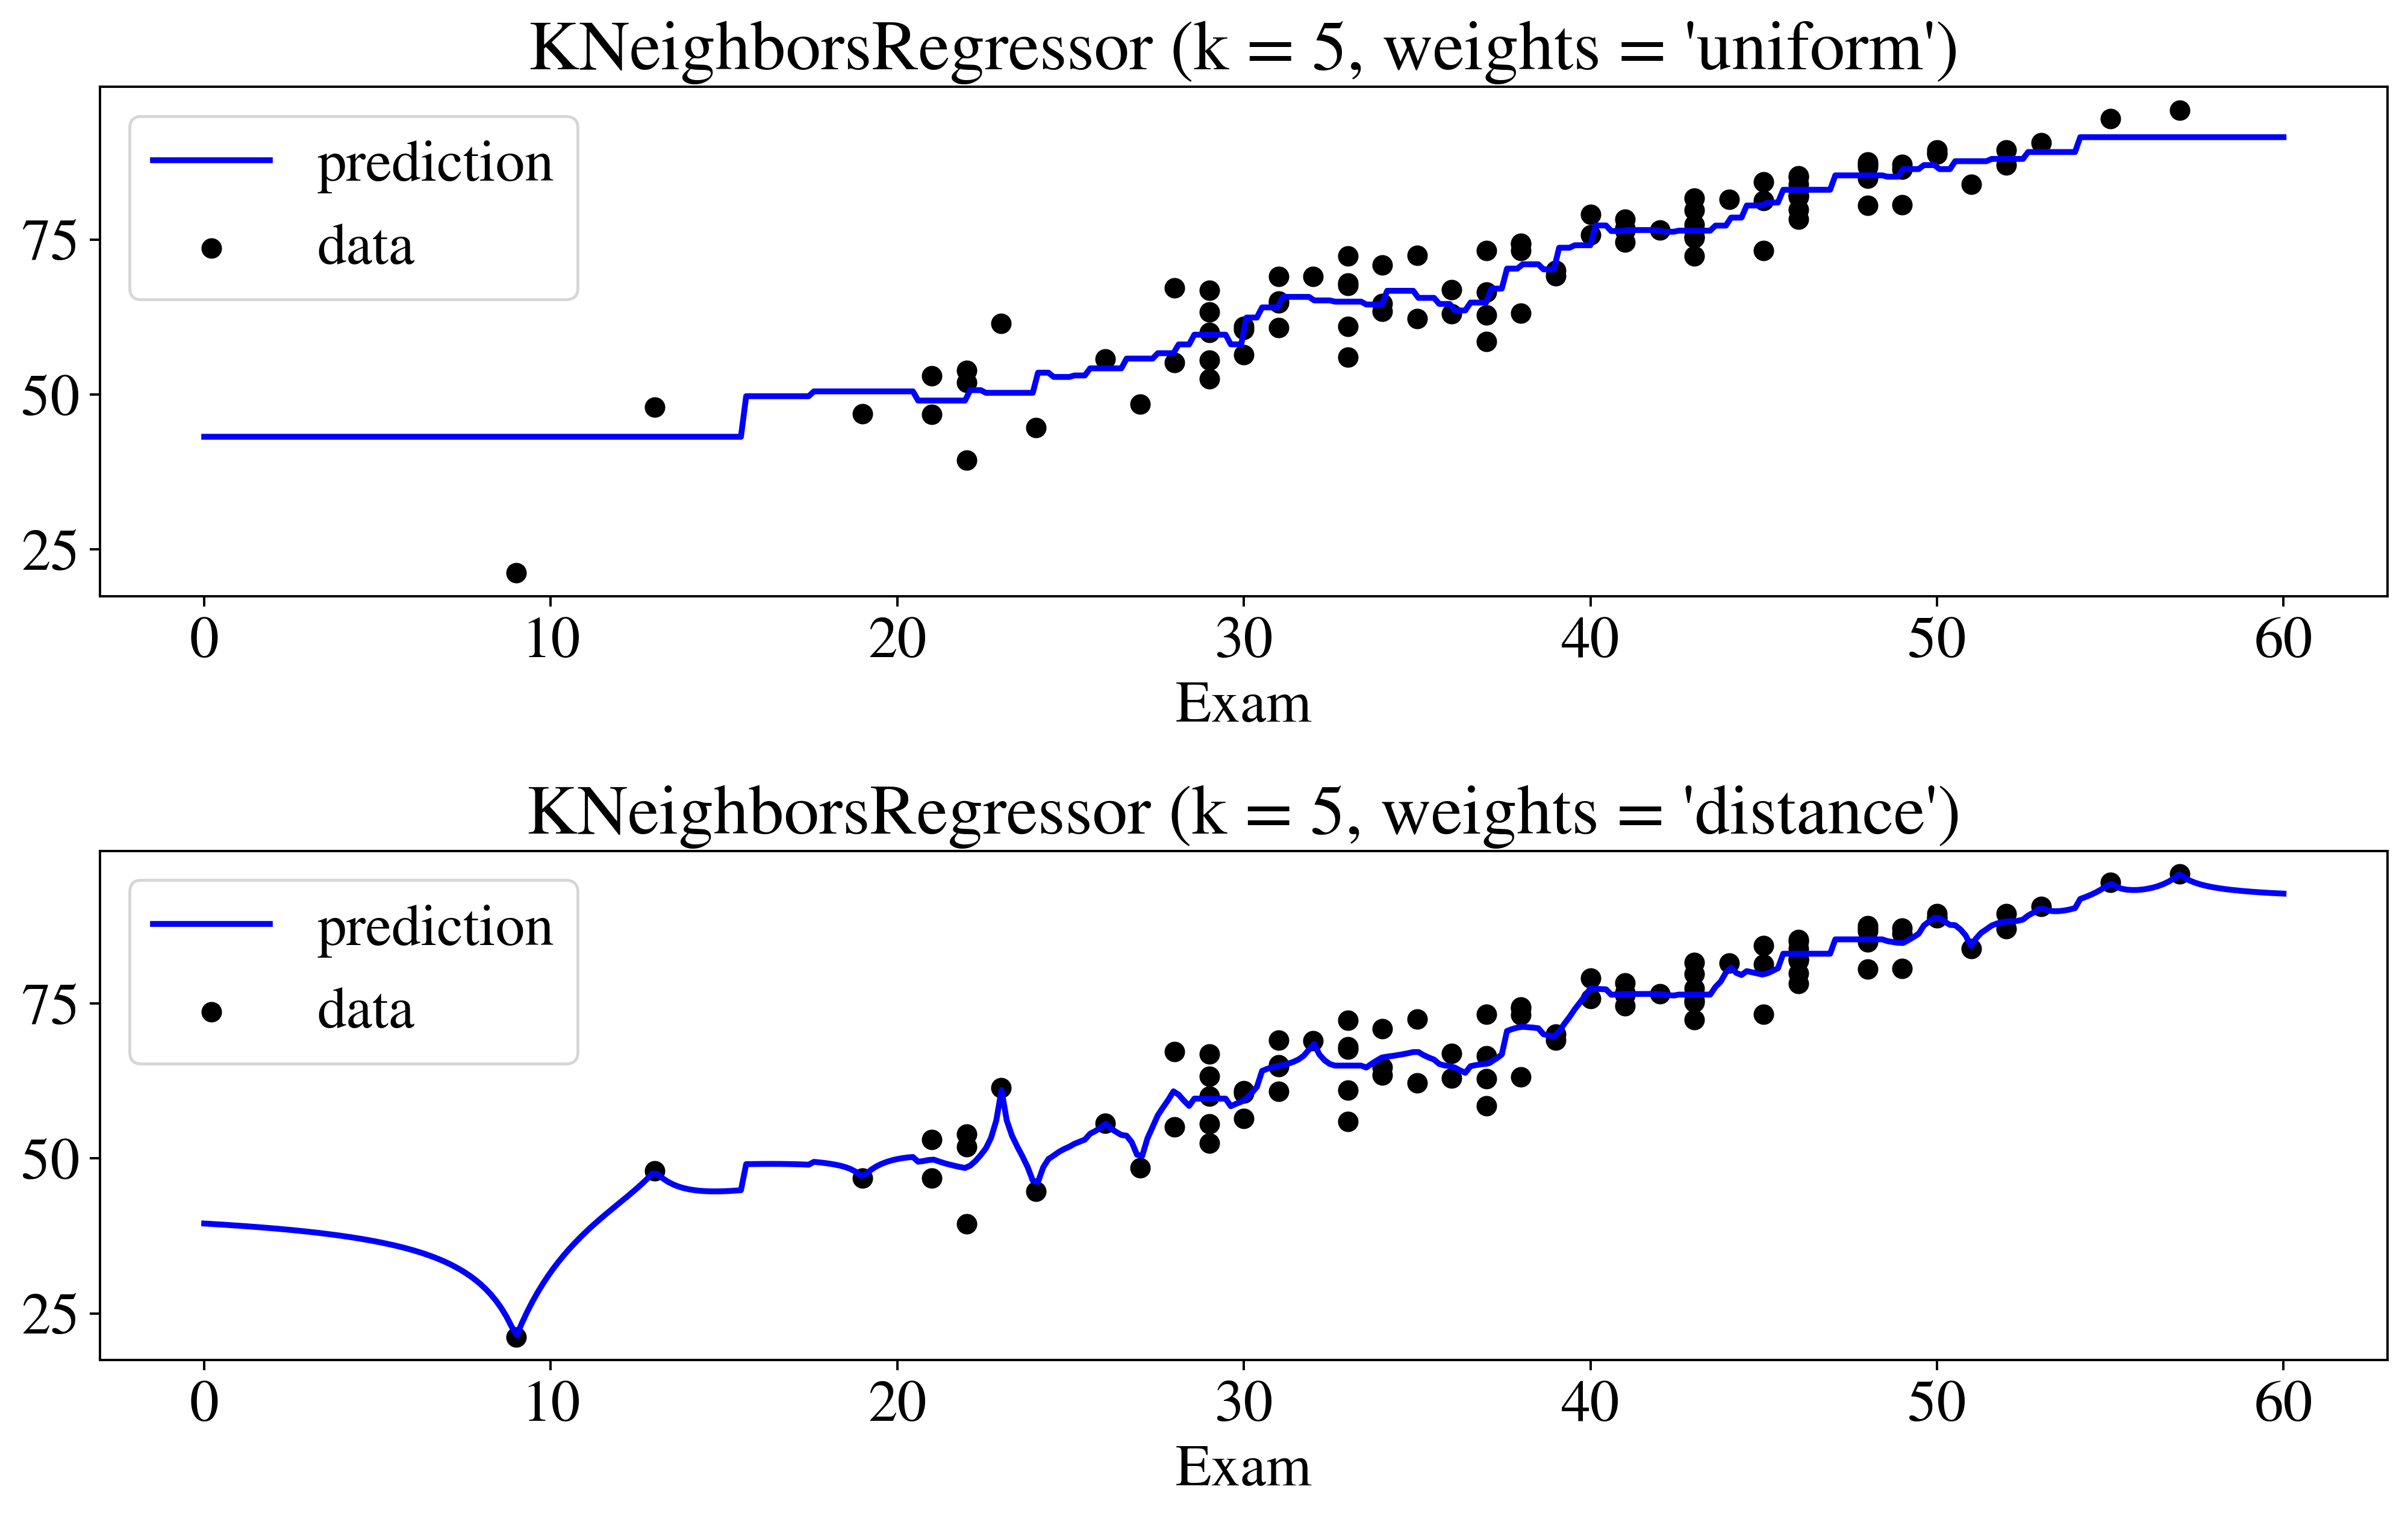

In [142]:
# Fit regression model
x = np.linspace(0, 60, 400)[:, np.newaxis]
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X, y).predict(x)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(x, y_hat, c='b', label='prediction')
    plt.axis('tight')
    plt.xlabel('Exam')
    #plt.ylabel('Total')
    plt.legend(loc='upper left')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.subplots_adjust( hspace=0.5)
    
plt.show()


**Exercise** Experiment on the above problem with different values of k. Which is the most optimal for this dataset? Why? How could you empirically confirm this?


In the above example, varying the distance metric will not make any difference since we are only using one dimension. However, varying the value of k will make a big difference to the model. We will now see how we can empirically determine what is the best value of k for this dataset.

For this, we will use the RMSE and the R^2 metrics.

First of all, let's train the model:

In [143]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
mod = knn.fit(X, y)


In [144]:
mod

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Next, we will create and array of exam values with a very small amount of jitter (otherwise the nans are returned).

In [145]:
x = np.reshape(grades.Exam.values, (len(grades.Exam), 1)) + 0.001


Then we create the predicted values: 

In [146]:
y_hat = mod.predict(x)


Next, define a method that calculates the R^2 and the RMSE measures:

In [149]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]
    

In [150]:
calculate_regression_goodness_of_fit(y, y_hat)

(0.7926495137473292, 4.815622698885573)

Now that we know that the function works, we want to re-train the model with different values of k, beginning with 2 to the size of the dataset, and inspect the effect that varying k has on the accuracy measures.

In [151]:
rsquare_arr = []
rmse_arr = []

for k in range(2, len(y)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)
    rsquare_arr.append(rsquare)


Text(0.5, 1.0, 'RMSE for the KNeighborsRegressor')

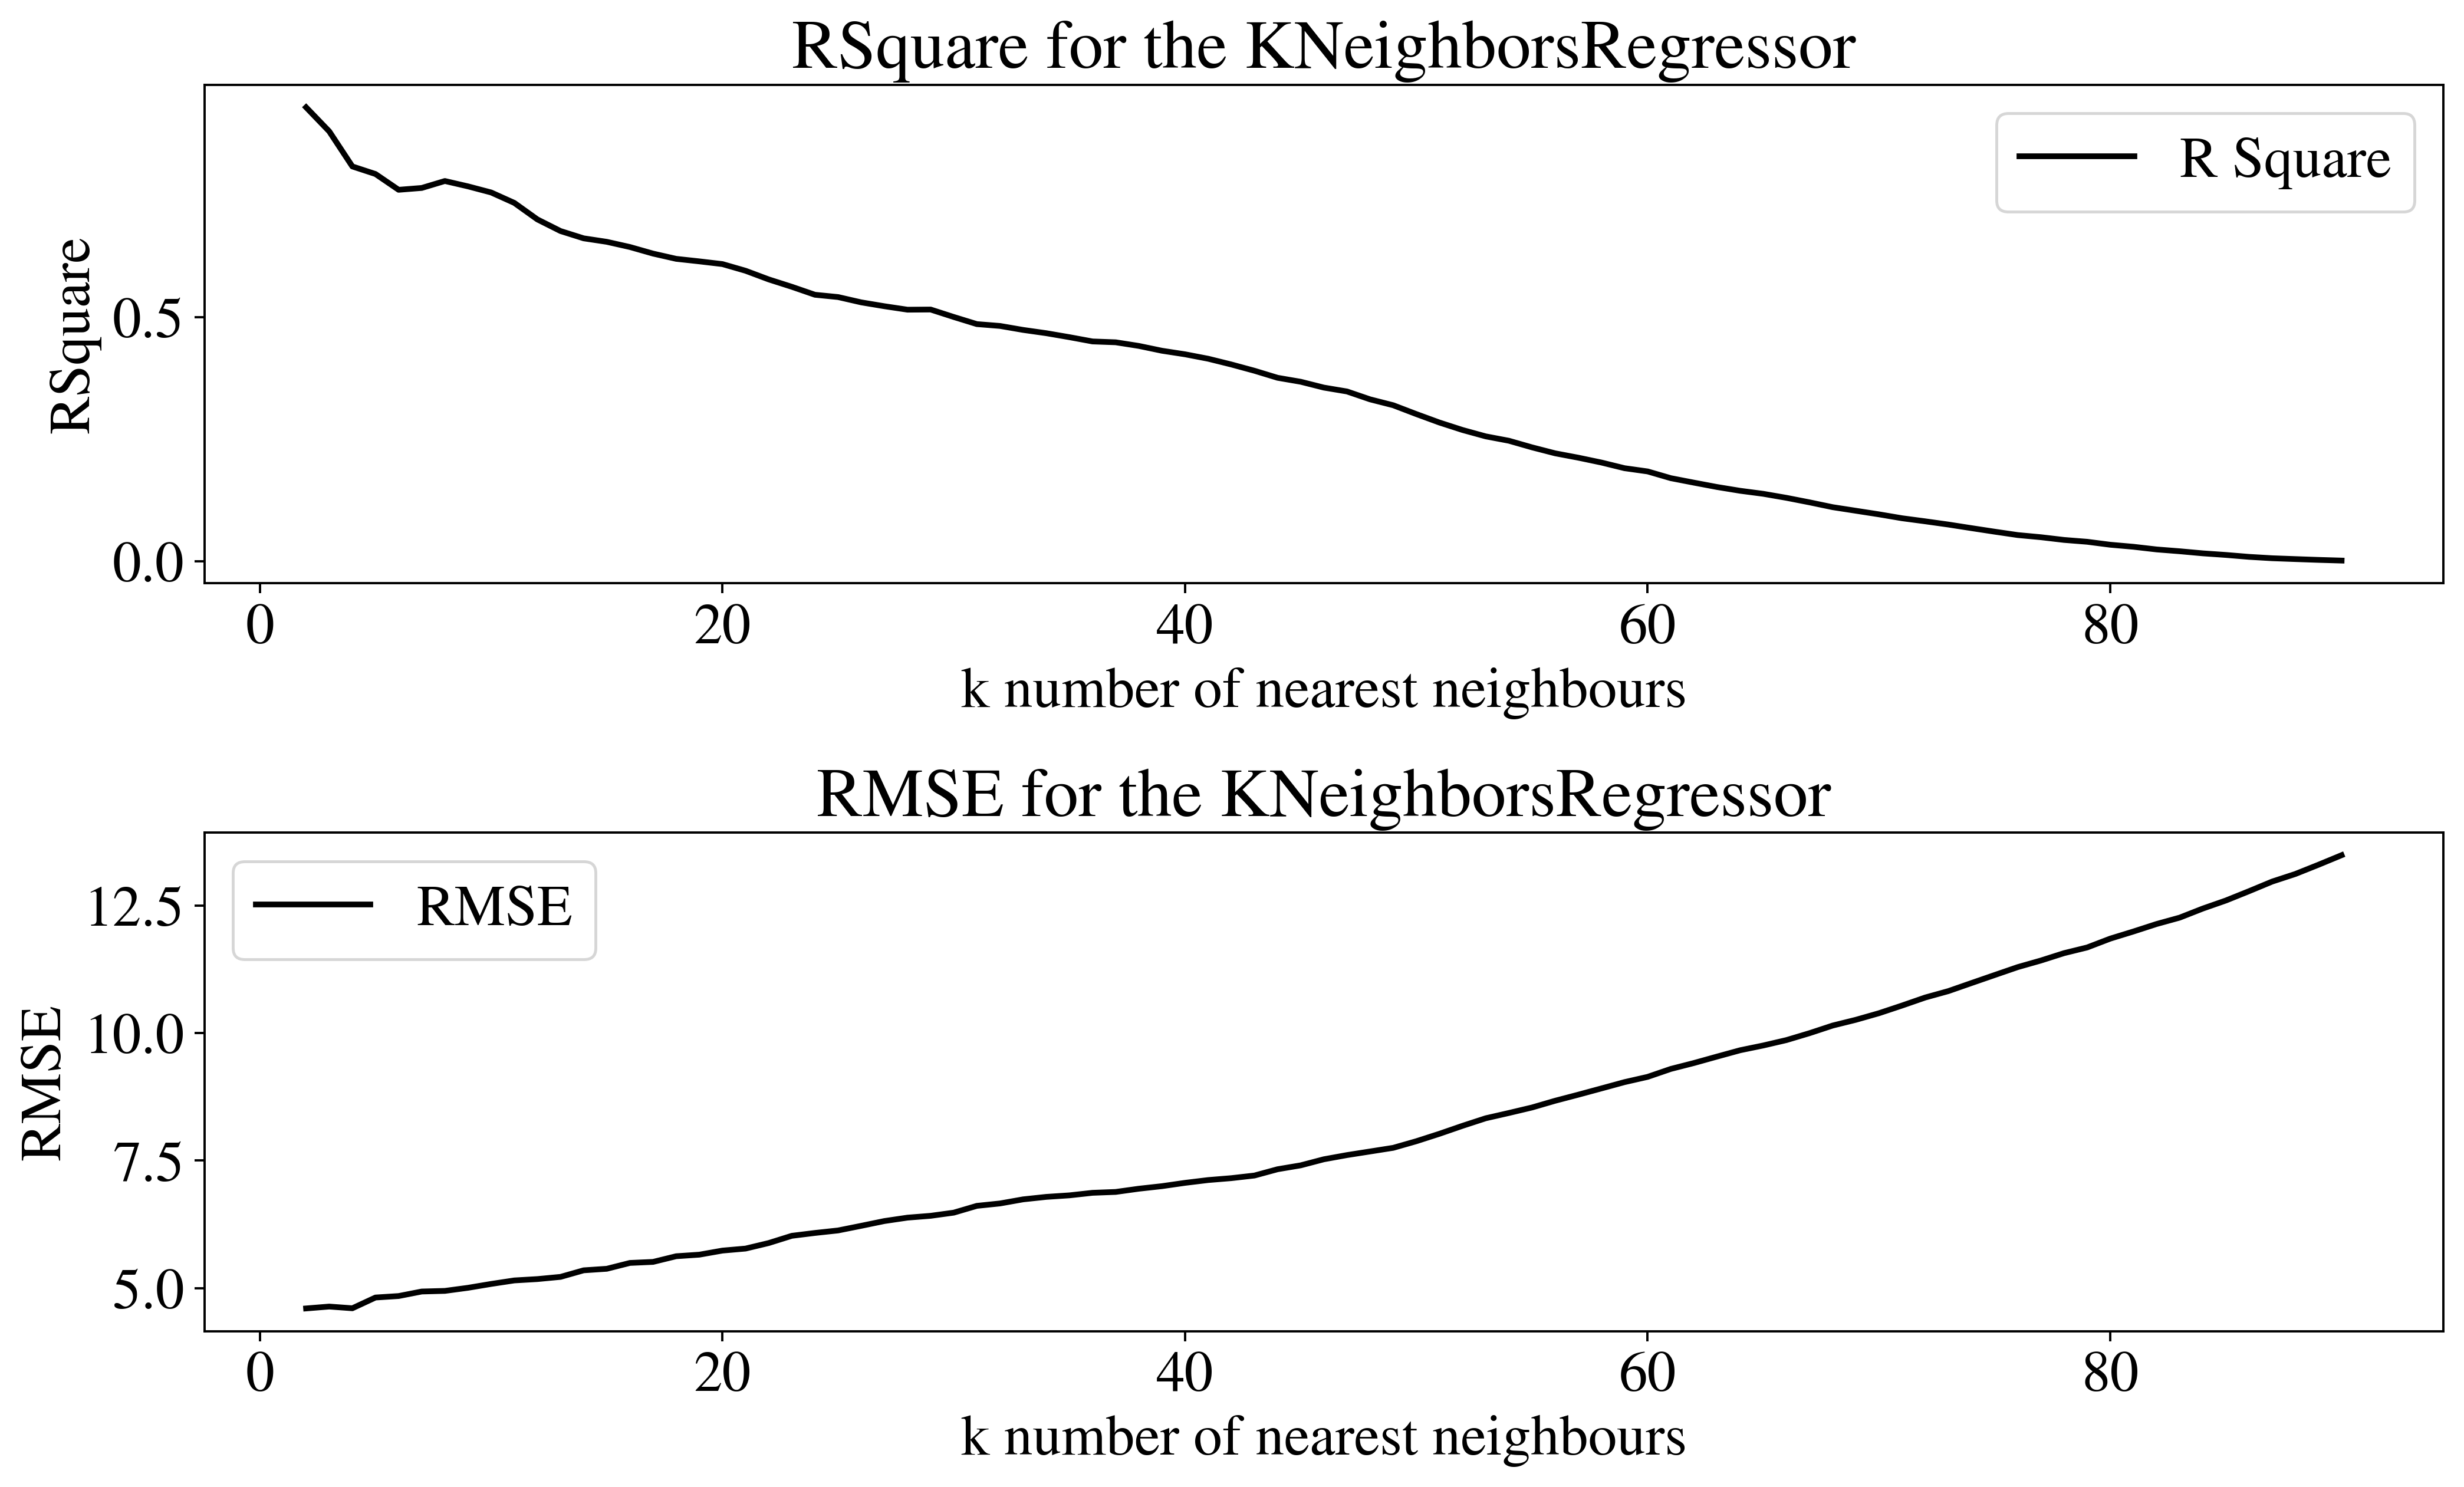

In [152]:
plt.subplot(2, 1, 1)
plt.plot(range(2, 91), rsquare_arr, c='k', label='R Square')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RSquare')
plt.legend(loc='upper right')
plt.title("RSquare for the KNeighborsRegressor")
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(range(2, 91), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")


**Exercise** Discuss the meaning of the above graphs.

**Exercise** Generate the above graphs for the regression task of predicting the student exam outcome based on the course work.

### Example (Classification)

Instead of predicting a continuous valued output, classification on the other hand predicts a class label or a category. The mechanics are however very much the same for both versions of kNN. 

In this example, we will look at the student grades problem again and will attempt to predict a student's final grade (categorical), based on assignment 1,2 and 3 marks. 

**Recall that normalization is a crucial step in kNN when dealing with multivariate data. The code below has not normalized the features and this is left as an exercise for you to complete at home, and to explore how this affects the final outcomes.**

In [166]:
grades.dtypes
grades

,Unnamed: 0,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode,grade_num
0,0,3.5,5.50,7.50,6.50,7.50,30.50,30.0,60.50,B-,INT,5
2,2,4.0,5.25,7.10,10.20,11.50,38.05,31.0,69.05,B,INT,4
4,4,4.5,4.75,7.40,10.30,8.80,35.75,40.0,75.75,B+,EXT,3
6,6,4.5,5.50,7.50,10.50,11.50,39.50,50.0,89.50,A+,INT,0
7,7,3.0,4.75,3.90,7.20,6.30,25.15,38.0,63.15,B-,EXT,5
...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,4.5,4.80,4.00,7.25,11.50,32.05,21.0,53.05,C,INT,7
124,124,4.0,3.00,7.50,10.50,10.00,35.00,33.0,68.00,B,INT,4
125,125,4.5,5.00,6.05,10.40,9.25,35.20,38.0,73.20,B,INT,4
126,126,4.5,5.50,6.50,9.00,11.50,37.00,32.0,69.00,B,INT,4


In [165]:
# create numeric column for the response
# note: features and response must both be entirely numeric!
mapping = {'A+':0, 'A':1, 'A-':2 ,'B+':3, 'B':4, 'B-':5, 'C+':6, 'C':7, 'R':8, 'D':9,'E':10}
grades['grade_num'] = grades.Grade.map(mapping)

# create X (features) three different ways
X = grades[['A3', 'A4', 'A5']]
#X = grades.loc[:, 'A3':'A5']
#X = grades.iloc[:, 0:3]

# create y (response)
y = grades.grade_num

# check the shape of X and y
print(X.shape)     # 91 by 3 (n=91, p=3)
print(y.shape)     # 91 (must match first dimension of X)
# y

(91, 3)
(91,)


In [167]:
# scikit-learn 4-step modeling pattern:

# Step 1: import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

# Step 2: instantiate the model
# note: all unspecified parameters are set to the defaults
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


In [168]:
# Step 3: fit the model with data (learn the relationship between X and y)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
# Step 4: use the "fitted model" to predict the response for a new observation

In [170]:
d = dict(zip(['A3', 'A4', 'A5'], [4, 5, 6]))
d         

{'A3': 4, 'A4': 5, 'A5': 6}

In [175]:
df = pd.DataFrame.from_dict(d, orient='index').T
df

,A3,A4,A5
0,4,5,6


In [182]:
# make a perdiction
res = knn.predict(df)
print(res)
[key for key in mapping if mapping[key] == res ]


[5]


['B-']

In [186]:
# predict for multiple observations at once
X_new = pd.DataFrame(columns=['A3', 'A4', 'A5'])
X_new.loc[0] = [3, 5, 4]
X_new.loc[1] = [6, 10, 12]
print(X_new)
res = knn.predict(X_new)
print(res)

[key for key in mapping if mapping[key] == res[0] ]

  A3  A4  A5
0  3   5   4
1  6  10  12
[7 2]


['C']

In [184]:
[key for key in mapping if mapping[key] == res[1] ]

['A-']

In [163]:
# try a different value of K ("tuning parameter")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
res = knn.predict(X_new)

print([key for key in mapping if mapping[key] == res[0] ])
print("predicted probabilities of class membership: " + str(knn.predict_proba(X_new)[0]))        # predicted probabilities of class membership

print([key for key in mapping if mapping[key] == res[1] ])
print("predicted probabilities of class membership: " + str(knn.predict_proba(X_new)[1]) )       # predicted probabilities of class membership


['C+']
predicted probabilities of class membership: [0.         0.         0.         0.         0.         0.
 0.33333333 0.33333333 0.33333333 0.         0.        ]
['A-']
predicted probabilities of class membership: [0.         0.         0.66666667 0.         0.33333333 0.
 0.         0.         0.         0.         0.        ]


**Exercise:**: Modify the above to make predictions based solely on the exam result. Compare the predictions when using A1,A2 and A3 and Exam as predictor.

## When to Use k-Nearest Neighbours

Nearest neighbours algorithm has been successful in a broad range of classification and regression problems. These include handwritten digits and satellite image scenes. Due to the fact that it is a non-parametric method, it is often effective in classification situations where the decision boundary is very irregular. 

Some other advantages it has over other methods include the ability to add new observations to the data without any computational effort and the easy of understanding and interpreting the outputs.


The few disadvantages of the nearest neighbours algorithm include its computational intensity when making predictions because the distance to every point has to be calculated; however, there are ways that this can to a degree be mitigated. Nearest neighbours algorithm is also sensitive to noisy and irrelevant features.

---